In [1]:
from src.plot import *
import yaml

## Plot a glance graph using GNNLens

In [2]:
%cd ..
with open("config.yaml") as config_file:
    config = yaml.safe_load(config_file)
device = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")

/Users/yingkang/4thBrain/GNN-eCommerce


In [3]:
checkpoint = '2023-02-18_071308'

In [4]:
checkpoint_dir = config['training']['checkpoints_dir']+checkpoint
test_df = pd.read_csv(checkpoint_dir+'/processed_test.csv')
g = create_dgl_graph(test_df.sample(frac=0.5))

n_users 15946, n_items 14266, len(glance) 31930, len(edge_weight) 63860


In [6]:
writer = add_gnnlens_graph('Glance_graph', g, 7)
!gnnlens --logdir Glance_graph

Server config: {'FRONT_ROOT': '/Users/yingkang/4thBrain/GNN-eCommerce/venv/lib/python3.9/site-packages/gnnlens/./visbuild', 'STATIC_FOLDER': '/Users/yingkang/4thBrain/GNN-eCommerce/venv/lib/python3.9/site-packages/gnnlens/./visbuild/static', 'LOGDIR': 'Glance_graph'}
 * Serving Flask app 'gnnlens.server' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7777
 * Running on http://192.168.0.172:7777
Press CTRL+C to quit
#index
127.0.0.1 - - [28/Feb/2023 17:08:44] "GET / HTTP/1.1" 304 -
127.0.0.1 - - [28/Feb/2023 17:08:44] "GET /static/css/2.929389fa.chunk.css HTTP/1.1" 304 -
127.0.0.1 - - [28/Feb/2023 17:08:44] "GET /static/css/main.8d5084fd.chunk.css HTTP/1.1" 304 -
127.0.0.1 - - [28/Feb/2023 17:08:44] "GET /static/js/2.b9f0e663.chunk.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Feb/2023 17:08:44] "GET /static/js/main.e553e190.chunk.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Feb/20

## Plot targetUser_recItems_path graph using NetworkX

In [7]:
inference_dir = config['inference']['recommendation']+checkpoint
hit_df = pd.read_csv(inference_dir+'/hit_df.csv')
im1312390 = nx_graph_df(hit_df, 1312390)
im976326 = nx_graph_df(hit_df, 976326)

/Users/yingkang/4thBrain/GNN-eCommerce/src/plot.py:151: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.paths = df.paths.apply(lambda x: list(map(int, x.split(', '))))
/Users/yingkang/4thBrain/GNN-eCommerce/src/plot.py:151: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.paths = df.paths.apply(lambda x: list(map(int, x.split(', '))))


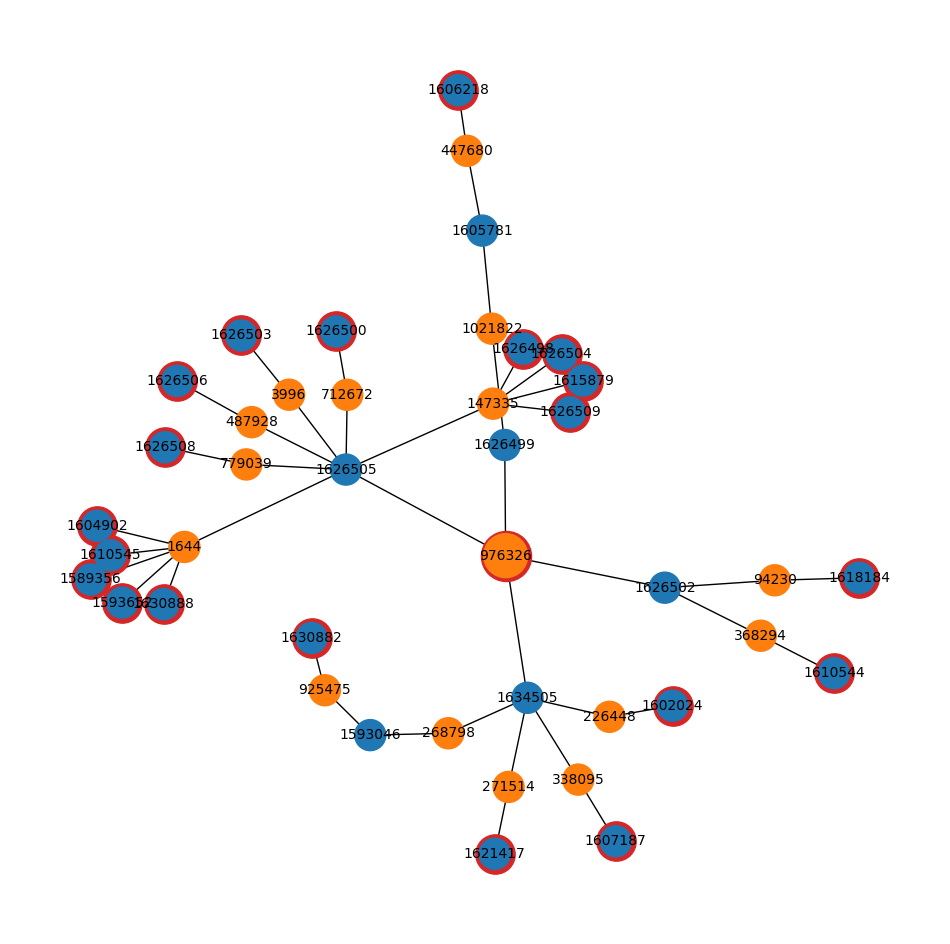

In [8]:
create_nx_graph(im976326, hit_df, 976326)

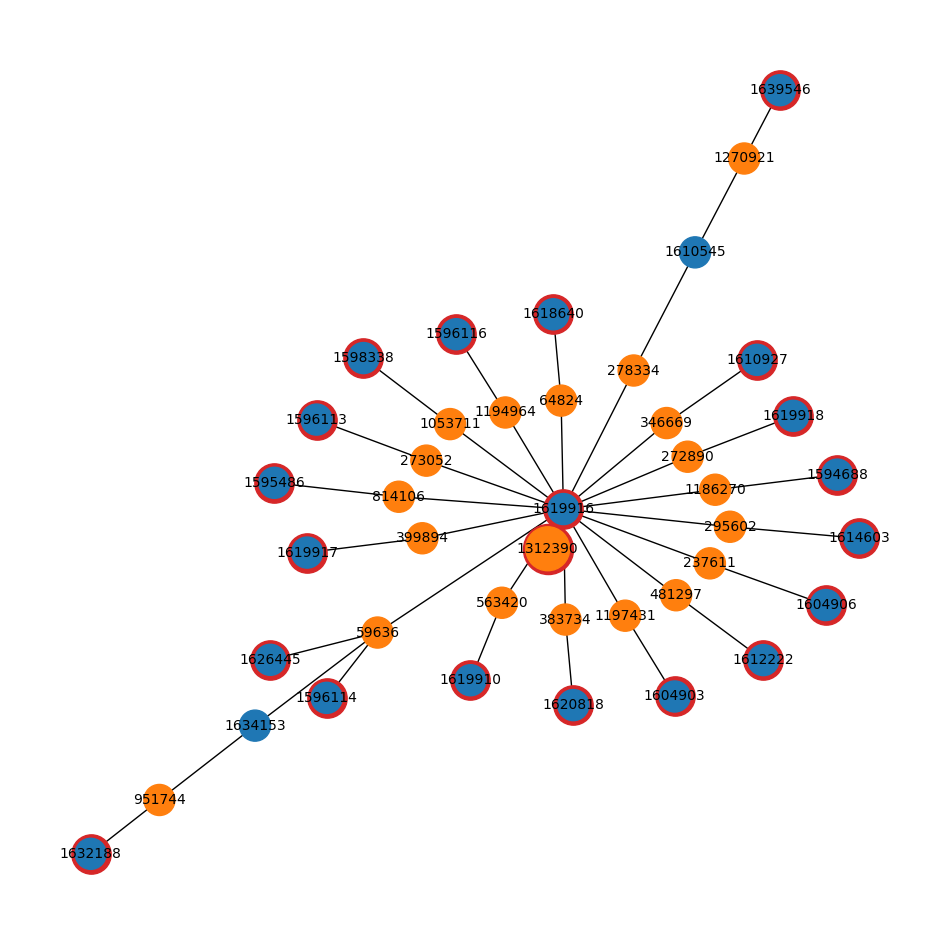

In [9]:
create_nx_graph(im1312390, hit_df, 1312390)